In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

from prophet import Prophet
from prophet.diagnostics import cross_validation
from prophet.diagnostics import performance_metrics

In [2]:
df = pd.read_csv("A_year_of_pizza_sales_from_a_pizza_place_872_68.csv")

In [3]:
df.head()

,Unnamed: 0,X,id,date,time,name,size,type,price
0,1,1,2015-000001,2015-01-01,11:38:36,hawaiian,M,classic,13.25
1,2,2,2015-000002,2015-01-01,11:57:40,classic_dlx,M,classic,16.00
2,3,3,2015-000002,2015-01-01,11:57:40,mexicana,M,veggie,16.00
3,4,4,2015-000002,2015-01-01,11:57:40,thai_ckn,L,chicken,20.75
4,5,5,2015-000002,2015-01-01,11:57:40,five_cheese,L,veggie,18.50


In [4]:
df['date'] = pd.to_datetime(df['date'], format = "%Y-%m-%d").dt.date

## Mapping daily data

In [5]:
yr_dates = pd.DataFrame(df['date'].drop_duplicates())

# Count 'id' values based on 'session'
date_orders = pd.DataFrame(df.groupby(['date'])['id'].count().reset_index(name='orders'))

# Merge the count back into the unique sessions DataFrame
prophet_days = yr_dates.merge(date_orders, on=['date'])

# Set column names for Prophet modelling
prophet_days.columns = ['ds','y']

In [6]:
# Fit the model 
m = Prophet(seasonality_mode='multiplicative')
m.add_seasonality('yearly', period=365, fourier_order=2, mode='multiplicative')
m.fit(prophet_days)

14:23:10 - cmdstanpy - INFO - Chain [1] start processing
14:23:10 - cmdstanpy - INFO - Chain [1] done processing


In [7]:
# Create the future dataframe and forecast
future = m.make_future_dataframe(periods=366)
forecast = m.predict(future)

C:\Users\hajar\anaconda3\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\hajar\anaconda3\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


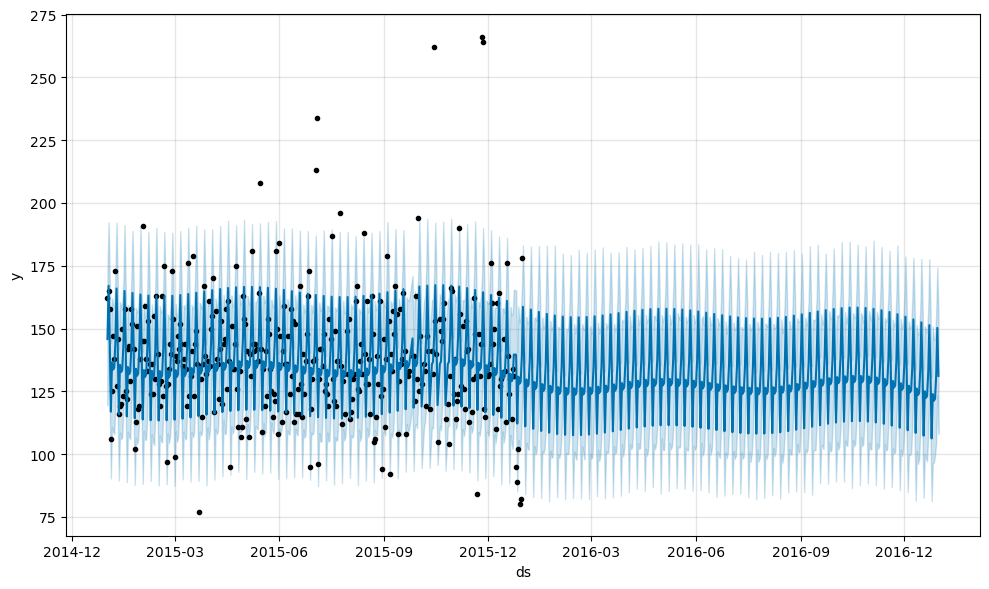

In [8]:
# Plot forecast 
fig1 = m.plot(forecast)

C:\Users\hajar\anaconda3\Lib\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\hajar\anaconda3\Lib\site-packages\prophet\plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
C:\Users\hajar\anaconda3\Lib\site-packages\prophet\plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np

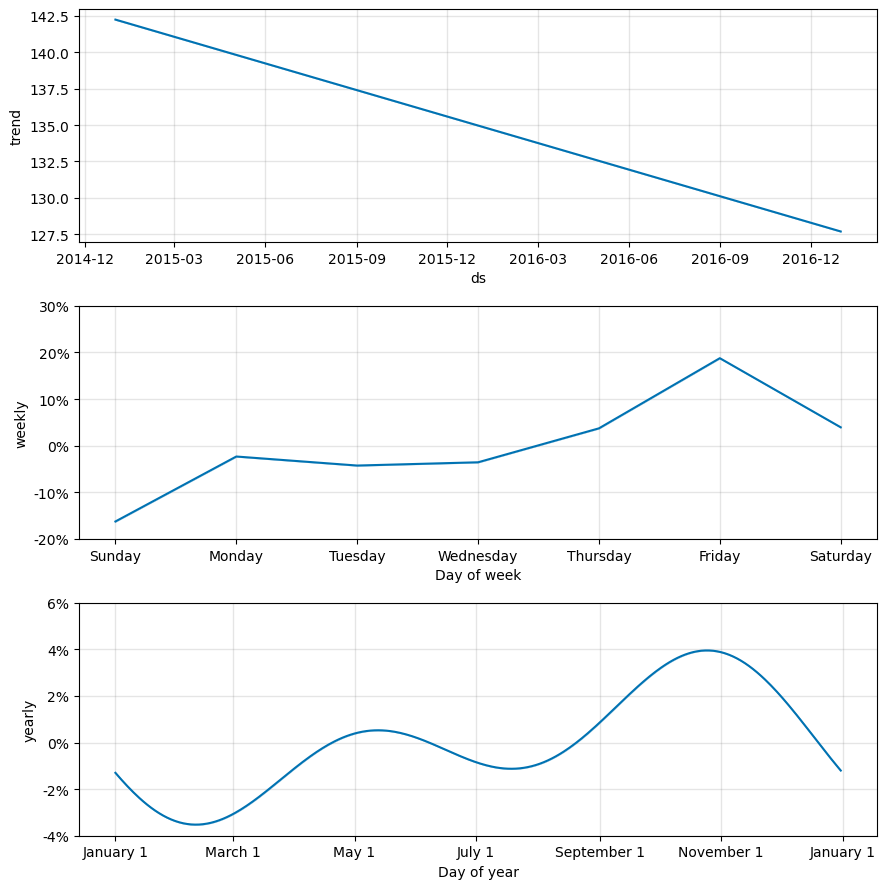

In [9]:
# Plot components
fig2 = m.plot_components(forecast)

### Cross validation of daily forecasting

In [10]:
df_cv = cross_validation(m, initial='180 days', period='1 days', horizon = '30 days')
df_p = performance_metrics(df_cv)
df_p['mae'].mean()
print(f"The percentage error in forecasting is {round((df_p['mae'].mean()/prophet_days['y'].mean())*100,2)}%.")

Seasonality has period of 365 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/155 [00:00<?, ?it/s]

14:23:12 - cmdstanpy - INFO - Chain [1] start processing
14:23:12 - cmdstanpy - INFO - Chain [1] done processing
14:23:12 - cmdstanpy - INFO - Chain [1] start processing
14:23:12 - cmdstanpy - INFO - Chain [1] done processing
14:23:12 - cmdstanpy - INFO - Chain [1] start processing
14:23:12 - cmdstanpy - INFO - Chain [1] done processing
14:23:12 - cmdstanpy - INFO - Chain [1] start processing
14:23:12 - cmdstanpy - INFO - Chain [1] done processing
14:23:12 - cmdstanpy - INFO - Chain [1] start processing
14:23:12 - cmdstanpy - INFO - Chain [1] done processing
14:23:12 - cmdstanpy - INFO - Chain [1] start processing
14:23:12 - cmdstanpy - INFO - Chain [1] done processing
14:23:13 - cmdstanpy - INFO - Chain [1] start processing
14:23:13 - cmdstanpy - INFO - Chain [1] done processing
14:23:13 - cmdstanpy - INFO - Chain [1] start processing
14:23:13 - cmdstanpy - INFO - Chain [1] done processing
14:23:13 - cmdstanpy - INFO - Chain [1] start processing
14:23:13 - cmdstanpy - INFO - Chain [1]

The percentage error in forecasting is 13.42%.


In [11]:
df_cv = cross_validation(m, initial='180 days', period='1 days', horizon = '60 days')
df_p = performance_metrics(df_cv)
df_p['mae'].mean()
print(f"The percentage error in forecasting the next 60 days is {round((df_p['mae'].mean()/prophet_days['y'].mean())*100,2)}%.")

Seasonality has period of 365 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/125 [00:00<?, ?it/s]

14:23:41 - cmdstanpy - INFO - Chain [1] start processing
14:23:41 - cmdstanpy - INFO - Chain [1] done processing
14:23:41 - cmdstanpy - INFO - Chain [1] start processing
14:23:41 - cmdstanpy - INFO - Chain [1] done processing
14:23:41 - cmdstanpy - INFO - Chain [1] start processing
14:23:41 - cmdstanpy - INFO - Chain [1] done processing
14:23:41 - cmdstanpy - INFO - Chain [1] start processing
14:23:41 - cmdstanpy - INFO - Chain [1] done processing
14:23:41 - cmdstanpy - INFO - Chain [1] start processing
14:23:41 - cmdstanpy - INFO - Chain [1] done processing
14:23:42 - cmdstanpy - INFO - Chain [1] start processing
14:23:42 - cmdstanpy - INFO - Chain [1] done processing
14:23:42 - cmdstanpy - INFO - Chain [1] start processing
14:23:42 - cmdstanpy - INFO - Chain [1] done processing
14:23:42 - cmdstanpy - INFO - Chain [1] start processing
14:23:42 - cmdstanpy - INFO - Chain [1] done processing
14:23:42 - cmdstanpy - INFO - Chain [1] start processing
14:23:42 - cmdstanpy - INFO - Chain [1]

The percentage error in forecasting the next 60 days is 18.11%.


In [12]:
df_cv = cross_validation(m, initial='180 days', period='1 days', horizon = '90 days')
df_p = performance_metrics(df_cv)
df_p['mae'].mean()
print(f"The percentage error in forecasting the next 90 days is {round((df_p['mae'].mean()/prophet_days['y'].mean())*100,2)}%.")

Seasonality has period of 365 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/95 [00:00<?, ?it/s]

14:24:04 - cmdstanpy - INFO - Chain [1] start processing
14:24:04 - cmdstanpy - INFO - Chain [1] done processing
14:24:04 - cmdstanpy - INFO - Chain [1] start processing
14:24:04 - cmdstanpy - INFO - Chain [1] done processing
14:24:05 - cmdstanpy - INFO - Chain [1] start processing
14:24:05 - cmdstanpy - INFO - Chain [1] done processing
14:24:05 - cmdstanpy - INFO - Chain [1] start processing
14:24:05 - cmdstanpy - INFO - Chain [1] done processing
14:24:05 - cmdstanpy - INFO - Chain [1] start processing
14:24:05 - cmdstanpy - INFO - Chain [1] done processing
14:24:05 - cmdstanpy - INFO - Chain [1] start processing
14:24:05 - cmdstanpy - INFO - Chain [1] done processing
14:24:05 - cmdstanpy - INFO - Chain [1] start processing
14:24:05 - cmdstanpy - INFO - Chain [1] done processing
14:24:06 - cmdstanpy - INFO - Chain [1] start processing
14:24:06 - cmdstanpy - INFO - Chain [1] done processing
14:24:06 - cmdstanpy - INFO - Chain [1] start processing
14:24:06 - cmdstanpy - INFO - Chain [1]

The percentage error in forecasting the next 90 days is 24.38%.


## Mapping monthly volumes

In [19]:
df['month'] = pd.to_datetime(df['date']).dt.month

In [20]:
# Count 'id' values based on 'session'
month_orders = pd.DataFrame(df.groupby(['month'])['id'].count().reset_index(name='y'))

In [21]:
# Map month values to month start dates and rename column to ds

month_dict = {1: '2015-01-01', 
         2: '2015-02-01', 
         3: '2015-03-01', 
         4: '2015-04-01',
         5: '2015-05-01',
         6: '2015-06-01',
         7: '2015-07-01',
         8: '2015-08-01',
         9: '2015-09-01',
         10: '2015-10-01',
         11: '2015-11-01',
         12: '2015-12-01'
        }

month_orders['ds'] = month_orders['month'].map(month_dict)
month_orders['ds'] = pd.to_datetime(month_orders['ds'], format='%Y-%m-%d')
month_orders = month_orders[['ds','y']]

14:25:44 - cmdstanpy - INFO - Chain [1] start processing
14:25:44 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\hajar\anaconda3\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\hajar\anaconda3\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


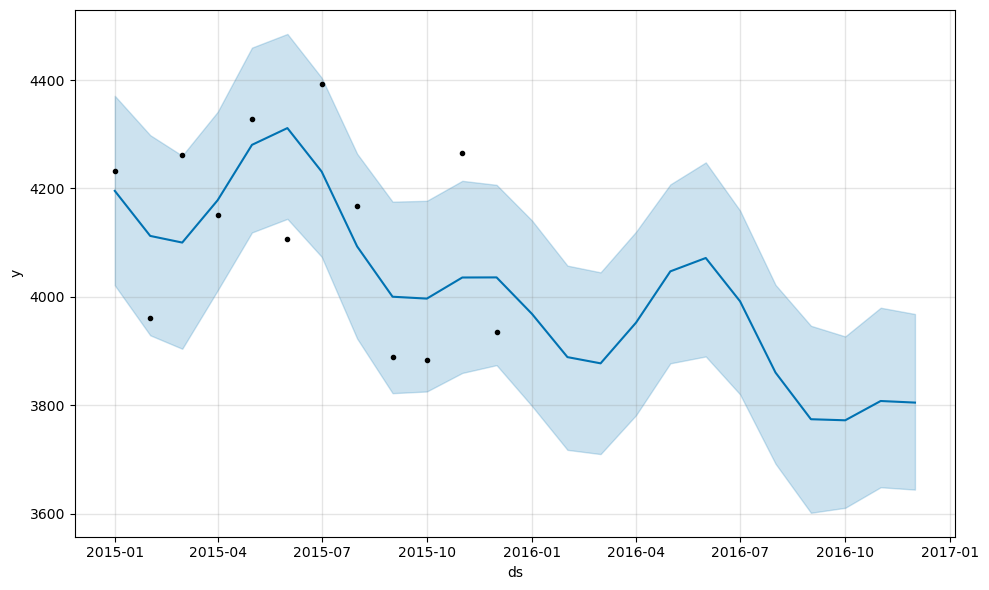

In [22]:
model = Prophet(seasonality_mode='multiplicative')
model.add_seasonality('yearly', period=365, fourier_order=2, mode='multiplicative')
model.fit(month_orders)
future = model.make_future_dataframe(periods=12, freq='MS')
fcst = model.predict(future)
fig3 = model.plot(fcst)

C:\Users\hajar\anaconda3\Lib\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\hajar\anaconda3\Lib\site-packages\prophet\plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
C:\Users\hajar\anaconda3\Lib\site-packages\prophet\plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np

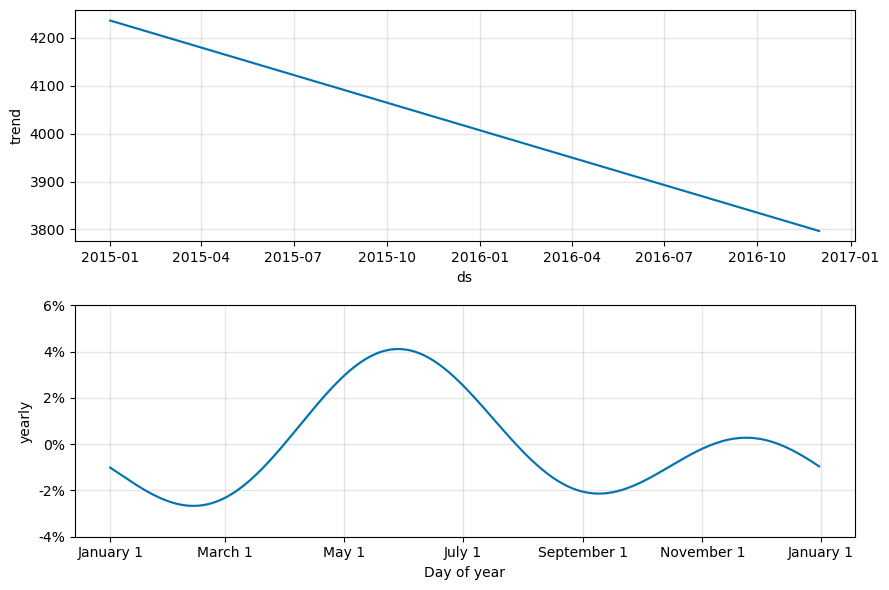

In [23]:
fig4 = model.plot_components(fcst)

In [24]:
df.head()

,Unnamed: 0,X,id,date,time,name,size,type,price,month
0,1,1,2015-000001,2015-01-01,11:38:36,hawaiian,M,classic,13.25,1
1,2,2,2015-000002,2015-01-01,11:57:40,classic_dlx,M,classic,16.00,1
2,3,3,2015-000002,2015-01-01,11:57:40,mexicana,M,veggie,16.00,1
3,4,4,2015-000002,2015-01-01,11:57:40,thai_ckn,L,chicken,20.75,1
4,5,5,2015-000002,2015-01-01,11:57:40,five_cheese,L,veggie,18.50,1


In [26]:
hourly_orders = df.groupby('hour').size().reset_index(name='orders')

KeyError: 'hour'